## Ipython Notebooks for standard evaluation process for trading algorithms

1. Directional Trading 

2. Long-Short Methods

In [74]:
import sys
sys.path.append('E:\\git_folder\\quant_models')

In [75]:
from util.utils import sample_df
import numpy as np

In [76]:
import pandas as pd
data_fn = "../../data/xu1_1min.csv"
df_price = pd.read_csv(data_fn)
test_df = df_price.copy()
test_df.loc[:,'datetime'] = pd.to_datetime(test_df.datetime)
test_df.set_index('datetime', inplace=True)
df_sampled = sample_df(test_df, '30T')

In [77]:
df_sampled.head()

,open,close,low,high,volume
datetime,,,,,
2014-06-27 00:30:00,6635.0,6635.0,6625.0,6635.0,119.0
2014-06-27 01:00:00,6635.0,6635.0,6630.0,6640.0,753.0
2014-06-27 01:30:00,6635.0,6630.0,6630.0,6635.0,21.0
2014-06-27 02:00:00,6630.0,6625.0,6625.0,6630.0,139.0
2014-06-27 02:30:00,6625.0,6625.0,6625.0,6625.0,5.0


In [78]:
df_sampled['rt'] = df_sampled.open.pct_change()

In [79]:
df_sampled.dropna(inplace=True)

In [80]:
df_sampled = df_sampled[['rt', 'open']]

In [81]:
M = np.random.randint(-1, 2, size=(df_sampled.shape[0],))
df_sampled['bs'] = M

In [82]:
df_sampled['pnl'] = df_sampled['bs'] * df_sampled['rt']

In [83]:
df_sampled.head()

,rt,open,bs,pnl
datetime,,,,
2014-06-27 01:00:00,0.000000,6635.0,-1,-0.000000
2014-06-27 01:30:00,0.000000,6635.0,-1,-0.000000
2014-06-27 02:00:00,-0.000754,6630.0,1,-0.000754
2014-06-27 02:30:00,-0.000754,6625.0,1,-0.000754
2014-06-27 03:00:00,0.000000,6625.0,1,0.000000


### Import the testing package

In [84]:
from util.metrics import sharpe_iid, max_drawdown_from_rtns, annual_geometric_returns, trade_num_stat
from util.utils import sample_pnl
import numpy as np

In [85]:
help(sample_pnl)

Help on function sample_pnl in module util.utils:

sample_pnl(inputdf, freq='1D', cum_mode=True)
    the function that sample the pnl dataframe based on the input sampling
    frequency. S, T, H, D, M denotes second, minute, hour, day and month
    
    :args
    inputdf: it is the input pnl dataframe:
                1. index:   datetime in pd.datetime format
                2. columns: stat_symbols
    freq:     the sampling frequency, which can be '1D', '5m' and so on
    cum_mode: binary variable, the inputdf contain the cum return if True else normal return
    
    :return
    the dataframe that is resampled based on freq, which is the normal return



In [86]:
 measure_df = {}

In [87]:
daily_pnl = sample_pnl(df_sampled, cum_mode=False)

In [88]:
win_day = daily_pnl.loc[daily_pnl.pnl > 0].shape[0]

In [89]:
loss_day = daily_pnl.loc[daily_pnl.pnl < 0].shape[0]

In [90]:
win_day_ratio = win_day/(loss_day + win_day)

In [91]:
print(win_day_ratio)
measure_df['win_day_ratio'] = win_day_ratio

0.4934210526315789


In [92]:
ann_sharpe = sharpe_iid(daily_pnl.pnl.values, factor=252, log=False)

In [93]:
print(ann_sharpe)
measure_df['ann_sharpe'] = win_day_ratio

-0.30887495556680394


In [94]:
dd_max = max_drawdown_from_rtns(daily_pnl.pnl.values, log=False)

In [95]:
print(dd_max[0])
measure_df['drop_down'] = dd_max[0]

-0.5724610187305763


In [96]:
ann_return = annual_geometric_returns(daily_pnl.pnl.values, log=False)

In [97]:
measure_df['ann_return'] = ann_return

In [98]:
num_trade = trade_num_stat(df_sampled.bs.values)

In [99]:
print(num_trade)
measure_df['trade_num'] = num_trade

23291.0


In [100]:
f = open("perf_stat.txt","w")
f.write( str(measure_df) )
f.close()

### Visualize

1. BS figure for best and worst periods

2. Cum Return Figure

In [101]:
from util.utils import sample_pnl, detect_duration, bs_plot
import matplotlib.pyplot as plt

In [102]:
daily_pnl.head(1)

,rt,open,bs,pnl
datetime,,,,
2014-06-27,-0.005255,205140.0,0,0.010581


In [103]:
df_sampled.head(1)

,rt,open,bs,pnl
datetime,,,,
2014-06-27 01:00:00,0.0,6635.0,-1,-0.0


In [104]:
daysinfo = detect_duration(daily_pnl, 'pnl', 2)

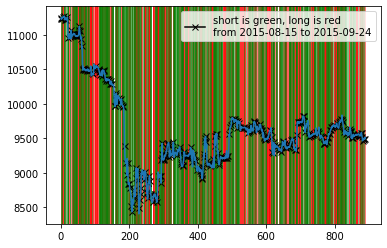

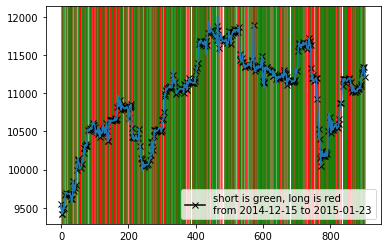

In [105]:
for mode in ['profit', 'loss']:
    check_pnl = df_sampled[daysinfo[mode][0]:daysinfo[mode][1]]
    bs_plot(check_pnl, ['open', 'bs'], mode)

In [106]:
df_sampled['cumrt']      = df_sampled.rt.cumsum()
df_sampled['modelcumrt'] = df_sampled.pnl.cumsum()

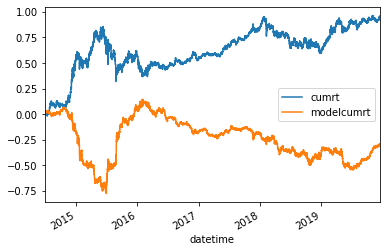

In [107]:
cum_fig = df_sampled[['cumrt', 'modelcumrt']].plot()

In [108]:
cum_fig = plt.gcf()
cum_fig.savefig("cum_return.png")

<Figure size 432x288 with 0 Axes>